###### Import Requried Libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("Data.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##### Check null values

In [8]:
data.shape

(8523, 12)

In [9]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
###### in our dataset their is missing values in the data set 
###### handling of missing values

###### find the mean and median of the missing values attributes which has numerical values init

In [12]:
###### if you observe we have one numerical attribute with missing values 
print("Mean of Item_Weight: ",data["Item_Weight"].mean())
print("Medain of Item_Weight: ",data["Item_Weight"].median())

Mean of Item_Weight:  12.857645184136183
Medain of Item_Weight:  12.6


##### thier is no much difference between the mean and median of Item_Weight
##### from this we can say that our data does't have outliers

#####  visualize the item weight attribute

(array([483., 870., 865., 664., 779., 629., 755., 735., 677., 603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <a list of 10 Patch objects>)

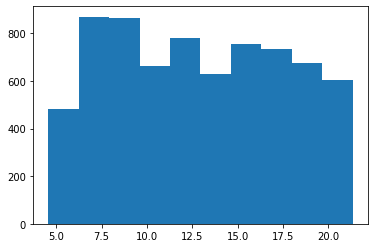

In [13]:
plt.hist(data["Item_Weight"])

###### fill missing values with the respective attribute mean or median

In [14]:
data["Item_Weight"]=data["Item_Weight"].fillna(data["Item_Weight"].mean())

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [17]:
data["Outlet_Size"].groupby(data["Outlet_Size"]).count()

Outlet_Size
High       932
Medium    2793
Small     2388
Name: Outlet_Size, dtype: int64

In [21]:
data["Outlet_Size"]=data["Outlet_Size"].fillna(data["Outlet_Size"].mode()[0])

In [22]:
data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

##### columns with non numerical data (strings)

In [23]:
data.select_dtypes(include=['object']).head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


In [30]:
data["Item_Fat_Content"].groupby(data["Item_Fat_Content"]).count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

In [31]:
# Improving Item_Fat_Content Column by replacing the lf with "low fat" and reg with "Regular"
data["Item_Fat_Content"] = data["Item_Fat_Content"].replace({"reg":"Regular","low fat":"Low Fat","LF":"Low Fat"})

In [32]:
data["Item_Fat_Content"].groupby(data["Item_Fat_Content"]).count()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

###### <font color="green"> EDA(Exploratory-Data-Analysis)</font>

In [33]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0, 0.5, 'y-axis')

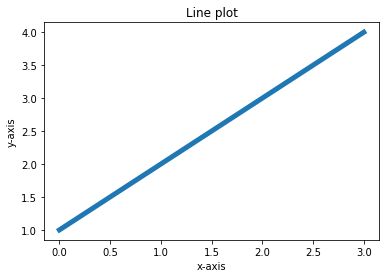

In [45]:
plt.plot([1,2,3,4],linewidth=5)
plt.title("Line plot")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

##### the x-axis ranges form 0to 3 and we have not give the x -axis , If you provide a single list or array to the plot() command, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you

Text(0, 0.5, 'y-axis')

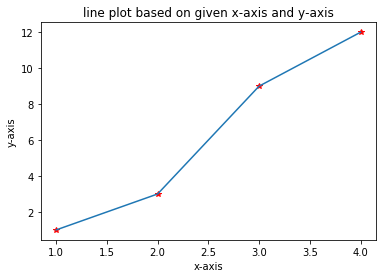

In [46]:
plt.plot([1,2,3,4],[1,3,9,12],"r*")
plt.plot([1,2,3,4],[1,3,9,12])
plt.title("line plot based on given x-axis and y-axis")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

Text(0, 0.5, 'y-axis')

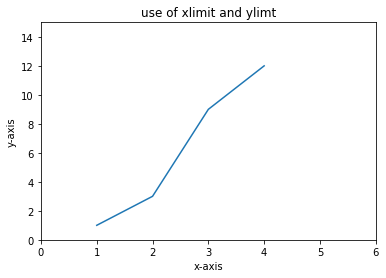

In [47]:
##### how to set x-axis limits means x-min and end with x-max , and same y-min and y-max
plt.plot([1,2,3,4],[1,3,9,12])
plt.xlim(0,6)## [x-min,y-max]
plt.ylim(0,15)## [y-min,y-max]
plt.title("use of xlimit and ylimt")
plt.xlabel("x-axis")
plt.ylabel("y-axis")

#### <font color = 'brown'> Univariate Analysis</font>
##### this analysis helps to find , how the data is distributed

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <a list of 10 Patch objects>)

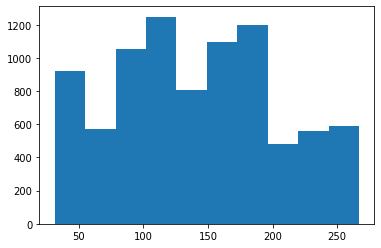

In [48]:
plt.hist(data["Item_MRP"])

###### boxplots helps to find outliers

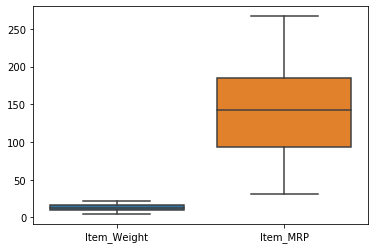

In [49]:
sns.boxplot(data=data.iloc[:,[1,5]])

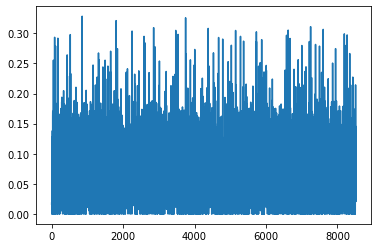

In [50]:
plt.plot(data["Item_Visibility"])

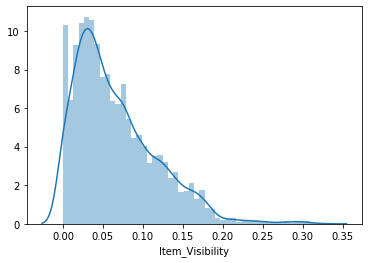

In [51]:
sns.distplot(data["Item_Visibility"],kde=True)

##### frequency plot (count of each item from types of items availbale )

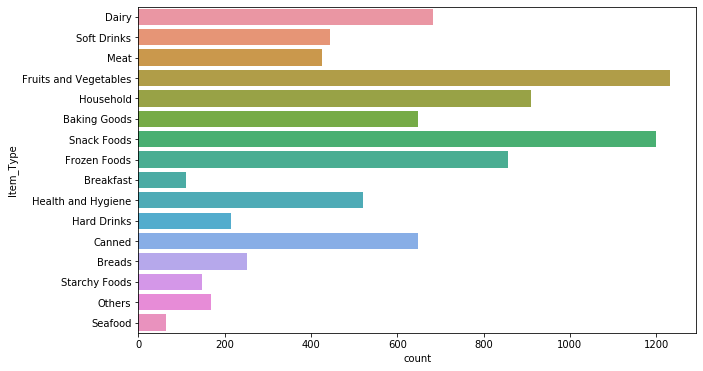

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(y=data["Item_Type"])

#### <font color="blue"> Pie Charts</font>

In [35]:
explode=(0,0.1,0,0)
f_list=set(data["Outlet_Type"])
fq_list=list(data["Outlet_Type"].groupby(data["Outlet_Type"]).count().values)

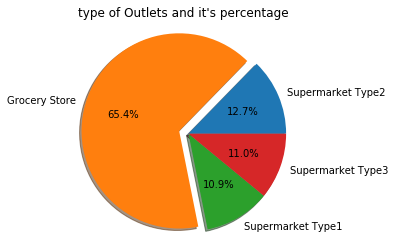

In [37]:
fig1, ax1 = plt.subplots()
ax1.pie(fq_list, explode=explode, labels=f_list, autopct='%1.1f%%',shadow=True, startangle=360)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("type of Outlets and it's percentage")
plt.show()

##### <font color="rbg">Multivariate Analysis</font> it helps to find the relationship bewteen the two varibales

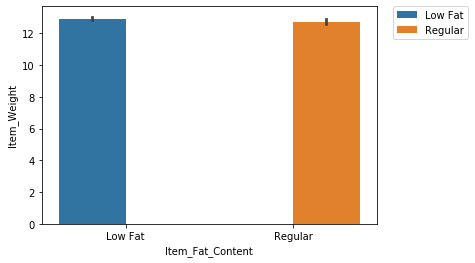

In [38]:
sns.barplot(y="Item_Weight",x="Item_Fat_Content",hue="Item_Fat_Content",data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Scatterplot

Text(0.5, 1.0, 'Relation between the Item_Weight and Item_MRP')

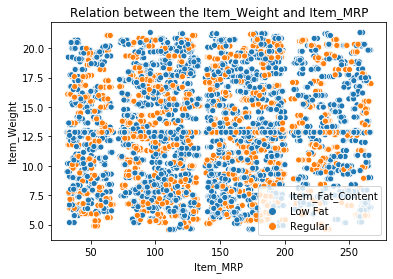

In [56]:
sns.scatterplot(y="Item_Weight",x="Item_MRP",hue="Item_Fat_Content",data=data)
plt.title("Relation between the Item_Weight and Item_MRP")

##### bar chart

Text(0.5, 1.0, 'Year Wise Sales')

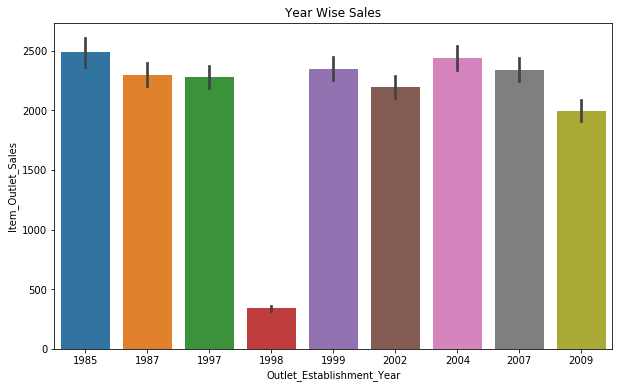

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=data)
plt.title("Year Wise Sales")

Text(0.5, 1.0, 'Sales of the each item')

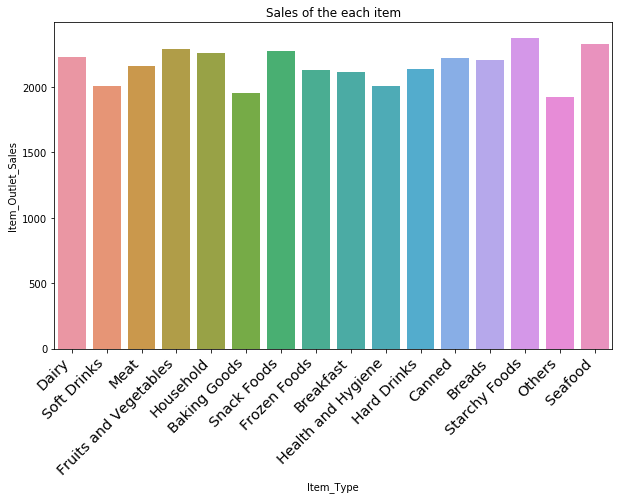

In [42]:
plt.figure(figsize=(10,6))
chart=sns.barplot(y=data["Item_Outlet_Sales"],x=data["Item_Type"],ci=None)
chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large')
plt.title("Sales of the each item")

In [43]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

##### <font color="orange">Grouped Bar chart</font>

###### From Below Chart You can observe clearly based on the outlet location type , different types of outlet types sales is going to be different

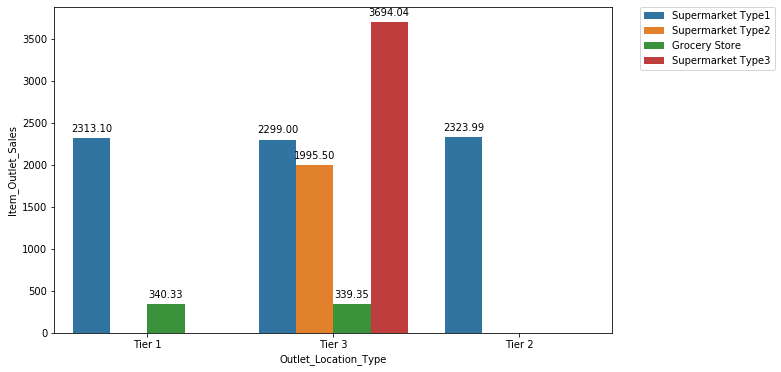

In [60]:
plt.figure(figsize=(10,6))
splot=sns.barplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",hue="Outlet_Type",data=data,ci=None)

for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2.,
                    p.get_height()), ha = 'center',
                    va = 'center', xytext = (0, 10),
                    textcoords = 'offset points')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

##### Correlation between the attributes

(-0.5, 5.5)

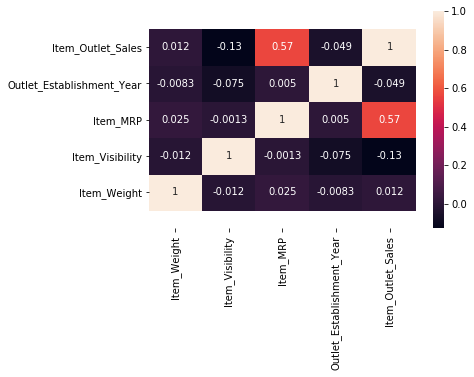

In [44]:
sns.heatmap(data.corr(),annot=True)
d,t=plt.ylim()
d+=0.5
t-=0.5
plt.ylim(t,d)